In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("hw04.ipynb")

# Homework 4: Functions, Tables, and Groups

Please complete this notebook by filling in the cells provided. Before you begin, execute the previous cell to load the provided tests.

**Helpful Resource:**
- [Python Reference](http://data8.org/su24/reference/): Cheat sheet of helpful array & table methods used in Data 8!

**Recommended Readings**: 

* [Visualizing Numerical Distributions](https://www.inferentialthinking.com/chapters/07/2/Visualizing_Numerical_Distributions.html)
* [Functions and Tables](https://www.inferentialthinking.com/chapters/08/Functions_and_Tables.html)

## 1. Burrito-ful San Diego

In [2]:
# Run this cell to set up the notebook, but please don't change it.

# These lines import the Numpy and Datascience modules.
import numpy as np
from datascience import *

# These lines do some fancy plotting magic.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

import warnings
warnings.simplefilter('ignore', FutureWarning)
warnings.filterwarnings("ignore")

Edwin, Gamy and Andrew are trying to use Data Science to find the best burritos in San Diego! Their friends Jessica, Aileen, and Conan provided them with two comprehensive datasets on many burrito establishments in the San Diego area taken and cleaned from [here](https://www.kaggle.com/srcole/burritos-in-san-diego/data)

The following cell reads in a table called `ratings` which contains names of burrito restaurants, their Yelp rating, Google rating, as well as their overall rating. The `Overall` rating is not an average of the `Yelp` and `Google` ratings, but rather it is the overall rating of the customers that were surveyed in the study above.


It also reads in a table called `burritos_types` which contains names of burrito restaurants, their menu items, and the cost of the respective menu item at the restaurant.

In [3]:
# Just run this cell
ratings = Table.read_table("ratings.csv")
ratings.show(5)
burritos_types = Table.read_table("burritos_types.csv").drop(0)
burritos_types.show(5)

Name,Yelp,Google,Overall
Albertacos,3.5,3.9,3.45
Burrito Factory,4.5,4.8,3.5
Burros and Fries,3.5,4.1,3.575
Caliente Mexican Food,3.5,4.4,3.25
California Burrito Company,3.5,4.4,3.2


Name,Menu_Item,Cost
Albertacos,California,5.7
Albertacos,Carne Asada,5.25
"Alberto's 623 N Escondido Blvd, Escondido, CA 92025",Carne Asada,4.59
Burrito Box,Steak With Guacamole,11.5
Burrito Factory,Steak Everything,7.35


**Question 1.** It would be easier if we could combine the information in both tables. Assign `burritos` to the result of joining the two tables together, so that we have a table with the ratings for every corresponding menu item from every restaurant. Each menu item has the same rating as the restaurant from which it is from.

*Note:* It doesn't matter which table you put in as the argument to the table method, either order will work for the autograder tests.

*Hint:* Which function lets us combine information from two tables? Refer to the [Python Reference Sheet](http://data8.org/su24/reference/) if you're unsure!


In [4]:
burritos = ratings.join('Name', burritos_types, 'Name')
burritos.show(10)

Name,Yelp,Google,Overall,Menu_Item,Cost
Albertacos,3.5,3.9,3.45,California,5.7
Albertacos,3.5,3.9,3.45,Carne Asada,5.25
Burrito Factory,4.5,4.8,3.5,Steak Everything,7.35
Burros and Fries,3.5,4.1,3.575,California,7.19
Burros and Fries,3.5,4.1,3.575,Carne Asada,6.89
Burros and Fries,3.5,4.1,3.575,Shrimp California,6.99
Caliente Mexican Food,3.5,4.4,3.25,California,6.47
Caliente Mexican Food,3.5,4.4,3.25,Carne Asada,5.56
Caliente Mexican Food,3.5,4.4,3.25,Fried Fish,5.56
California Burrito Company,3.5,4.4,3.2,California,5.5


In [5]:
grader.check("q1_1")

q1_1 results: All test cases passed!

<!-- BEGIN QUESTION -->

**Question 2.** Let's look at how the Yelp scores compare to the Google scores in the `burritos` table. First, assign `yelp_google_tbl` to a table only containing the columns `Yelp` and `Google`. Then, make a scatter plot with Yelp scores on the x-axis and the Google scores on the y-axis.


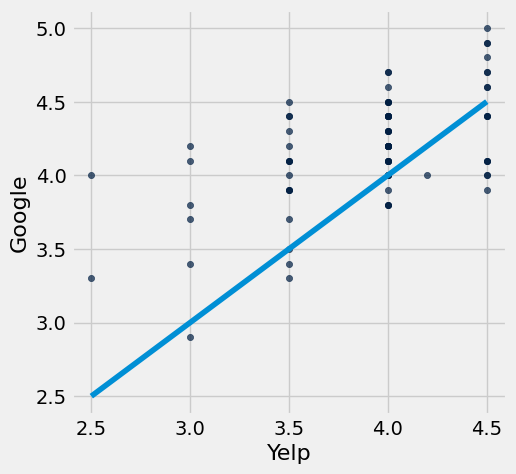

In [6]:
yelp_google_tbl = ratings.drop('Name', 'Overall')
yelp_google_tbl.scatter('Yelp', 'Google')	

# Don't change/edit/remove the following line.
# To help you make conclusions, we have plotted a straight line on the graph (y=x).
plt.plot(np.arange(2.5,5,.5), np.arange(2.5,5,.5));

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**Question 3.** Looking at the scatter plot you just made in Question 1.2, do you notice any pattern(s) or relationships between Yelp and Google ratings (i.e. is one of the two types of scores consistently higher than the other one)? If so, describe them **briefly** in the cell below.


Google reviews tend to be higher then yelp reviews

<!-- END QUESTION -->

Here's a refresher on how `.group` works! You can read how `.group` works in the [textbook](https://www.inferentialthinking.com/chapters/08/2/Classifying_by_One_Variable.html), or you can view the video below. The video resource was made by a past staff member, Divyesh Chotai!

You can also use the [Table Functions Visualizer](http://data8.org/interactive_table_functions/) to get some more hands-on experience with the `.group` function.

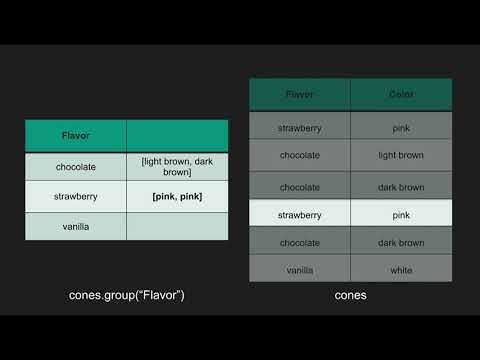

In [7]:
# Don't worry about what this code does! It simply embeds a YouTube video into a code cell.
from IPython.display import YouTubeVideo
YouTubeVideo("HLoYTCUP0fc")

**Question 4.** There are so many types of California burritos in the `burritos` table! Gamy wants to consider his options for burritos based on rankings. For the sake of these questions, we are treating each menu item's rating the same as its respective restaurant's, as we do not have the rating of every single item at these restaurants. You do not need to worry about this fact, but we thought to mention it!

Create a table with two columns: the first column include the **names of the burritos** and the second column should contain the **average overall rating** of that burrito across restaurants. **In your calculations, you should only compare burritos that contain the word "California".** For example, there are "California" burritos, "California Breakfast" burritos, "California Surf And Turf" burritos, etc.

*Hint:* “California” is case sensitive (“California” is not the same as “california”)! Consult the table in 6.2.5 of the textbook for a way to check whether a string contains "California".

*Note:* For reference, the staff solution only used one line. However, feel free to break up the solution into multiple lines and steps; just make sure you assign the final output table to `california_burritos`! 


In [11]:
california_burritos = burritos.where('Menu_Item', are.containing('California')).select('Menu_Item', 'Overall').group('Menu_Item', np.average)
california_burritos

Menu_Item,Overall average
California,3.5242
California (Only Cheese),4.1
California + Guac + Sour Cream,3.4
California - Chicken,3.45839
California - Pork Adobada,3.26429
California - Steak,3.26429
California Breakfast,2.75833
California Chicken,3.54815
California Chipotle,4.36667
California Everything,4.1


In [9]:
grader.check("q1_4")

q1_4 results: All test cases passed!

**Question 5.** Given this new table `california_burritos`, Andrew can figure out the name of the California burrito with the highest overall average rating! Assign `best_california_burrito` to a line of code that outputs the string that represents the name of the California burrito with the highest overall average rating. If multiple burritos satisfy this criteria, you can output any one of them.


In [34]:
best_california_burrito = california_burritos.sort("Overall average", descending = True).column('Menu_Item').item(0)
best_california_burrito

'California Chipotle'

In [35]:
grader.check("q1_5")

q1_5 results: All test cases passed!

<!-- BEGIN QUESTION -->

**Question 6.** Edwin thinks that burritos in San Diego are cheaper (and taste better) than the burritos in Berkeley. Plot a histogram that visualizes that distribution of the costs of the burritos from San Diego in the `burritos` table. Also use the provided `cost_bins` variable when making your histogram, so that the histogram is more visually informative.


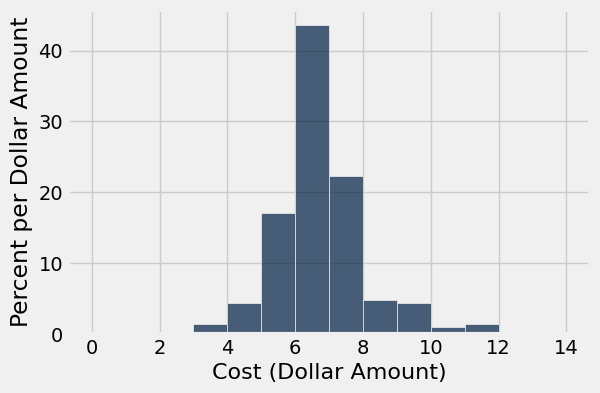

In [39]:
cost_bins = np.arange(0, 15, 1) # Do not change this line
# Please also use the provided bins
burritos.hist('Cost', bins= cost_bins, unit= 'Dollar Amount')

## 2. San Francisco City Employee Salaries

This exercise is designed to give you practice with using the Table methods `.pivot` and `.group`. Here is a link to the [Python Reference](http://data8.org/su24/reference/) in case you need a quick refresher. The [Table Function Visualizer](http://data8.org/interactive_table_functions/) may also be a helpful tool.

Run the cell below to view a demo on how you can use pivot on a table. (Thank you to past staff Divyesh Chotai!) 

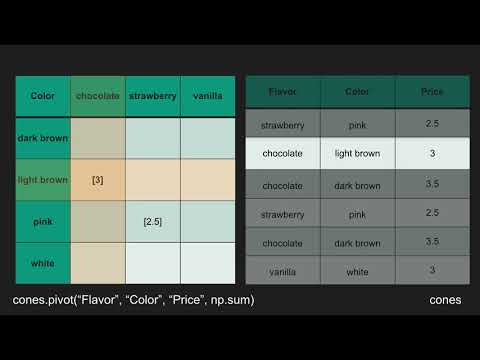

In [40]:
# Don't worry about what this code does! It simply embeds a YouTube video into a code cell.
from IPython.display import YouTubeVideo
YouTubeVideo("4WzXo8eKLAg")

The data source we will use within this portion of the homework is [publicly provided](https://data.sfgov.org/City-Management-and-Ethics/Employee-Compensation/88g8-5mnd/data) by the City of San Francisco. We have filtered it to retain just the relevant columns and restricted the data to the calendar year 2019. Run the following cell to load our data into a table called `full_sf`.

In [41]:
full_sf = Table.read_table("sf2019.csv")
full_sf.show(5)

Organization Group,Department,Job Family,Job,Salary,Overtime,Benefits,Total Compensation
Public Protection,Adult Probation,Information Systems,IS Trainer-Journey,91332,0,40059,131391
Public Protection,Adult Probation,Information Systems,IS Engineer-Assistant,123241,0,49279,172520
Public Protection,Adult Probation,Information Systems,IS Business Analyst-Senior,115715,0,46752,162468
Public Protection,Adult Probation,Information Systems,IS Business Analyst-Principal,159394,0,57312,216706
Public Protection,Adult Probation,Information Systems,IS Programmer Analyst,70035,0,28671,98706


The table has one row for each of the 44,525 San Francisco government employees in 2019.

The first four columns describe the employee's job. For example, the employee in the third row of the table had a job called "IS Business Analyst-Senior". We will call this the employee's *position* or *job title*. The job was in a Job Family called Information Systems (hence the IS in the job title), and was in the Adult Probation Department that is part of the Public Protection Organization Group of the government. You will mostly be working with the `Job` column.

The next three columns contain the dollar amounts paid to the employee in the calendar year 2019 for salary, overtime, and benefits. Note that an employee’s salary does not include their overtime earnings.

The last column contains the total compensation paid to the employee. It is the sum of the previous three columns:

$$\text{Total Compensation} = \text{Salary} + \text{Overtime} + \text{Benefits}$$

For this homework, we will be using the following columns:
1. `Organization Group`: A group of departments. For example, the Public Protection Org. Group includes departments such as the Police, Fire, Adult Protection, District Attorney, etc.
2. `Department`: The primary organizational unit used by the City and County of San Francisco.
3. `Job`: The specific position that a given worker fills.
4. `Total Compensation`: The sum of a worker's salary, overtime, and benefits in 2019.


Run the following cell to select the relevant columns and create a new table named `sf`.

In [48]:
sf = full_sf.select("Job", "Department", "Organization Group",  "Total Compensation")
sf.show(5)

Job,Department,Organization Group,Total Compensation
IS Trainer-Journey,Adult Probation,Public Protection,131391
IS Engineer-Assistant,Adult Probation,Public Protection,172520
IS Business Analyst-Senior,Adult Probation,Public Protection,162468
IS Business Analyst-Principal,Adult Probation,Public Protection,216706
IS Programmer Analyst,Adult Probation,Public Protection,98706


We want to use this table to generate arrays with the job titles of the members of each **Organization Group**.

**Question 1.** Set `job_titles` to a table with two columns. The first column should be called `Organization Group` and have the name of every "Organization Group" each listed only once in this column, and the second column should be called `Jobs` with each row in that second column containing an *array* of the names of all the job titles within that "Organization Group". Don't worry if there are multiple of the same job titles.

*Hint 1:* Think about how `group` works: it collects values into an array and then applies a function to that array. We have defined two functions below for you, and you will need to use one of them in your call to `group`. 

*Hint 2:* You might need to rename one of the columns.


In [49]:
# Pick one of the two functions defined below in your call to group.
def first_item(array):
    '''Returns the first item'''
    return array.item(0)

def full_array(array):
    '''Returns the array that is passed through'''
    return array 

# Make a call to group using one of the functions above when you define job_titles
job_titles = sf.select('Organization Group', 'Job').group('Organization Group', full_array).relabeled('Job full_array', 'Jobs')
job_titles


Organization Group,Jobs
Community Health,"['Painter Supervisor 1' 'Painter' 'Painter' ..., 'Nursin ..."
Culture & Recreation,['Electrician' 'Executive Secretary 2' 'Bldgs & Grounds ...
General Administration & Finance,"['Painter' 'Painter' 'Electrician' ..., 'Investigator, T ..."
Human Welfare & Neighborhood Development,['Dept Head I' 'Administrative Analyst' 'Community Devel ...
Public Protection,['IS Trainer-Journey' 'IS Engineer-Assistant' 'IS Busine ...
"Public Works, Transportation & Commerce",['Heavy Equip Ops Asst Sprv' 'Heavy Equipment Ops Sprv' ...


In [45]:
grader.check("q2_1")

q2_1 results: All test cases passed!

<!-- BEGIN QUESTION -->

**Question 2.** At the moment, the `Job` column of the `sf` table is not sorted (no particular order). Would the arrays you generated in the `Jobs` column of the previous question be the same if we had sorted alphabetically instead before generating them? Explain your answer. To receive full credit, your answer should reference *how* the `.group` method works, and how sorting the `Jobs` column would affect this.  **(8 Points)**

*Note:* Two arrays are the **same** if they contain the same number of elements and the elements located at corresponding indexes in the two arrays are identical. An example of arrays that are NOT the same: `array([1,2]) != array([2,1])`.


The arrays in the Jobs column would not be the same because the .group method goes through the table in order placing the items into the array. If it was sorted alphabetically, the arrays in the Jobs column would then be sorted alphabetically too.

<!-- END QUESTION -->

**Question 3.** Set `department_ranges` to a table containing departments as the rows, and the organization groups as the columns. The values in the rows should correspond to a total compensation range, where range is defined as the **difference between the highest total compensation and the lowest total compensation in the department for that organization group**.

*Hint:* First you'll need to define a new function `compensation_range` which takes in an array of compensations and returns the range of compensations in that array.


In [95]:
# Define compensation_range first
def compensation_range(array):
    return max(array) - min (array)

\
department_ranges = sf.pivot('Organization Group', 'Department', 'Total Compensation', compensation_range)
department_ranges

Department,Community Health,Culture & Recreation,General Administration & Finance,Human Welfare & Neighborhood Development,Public Protection,"Public Works, Transportation & Commerce"
Academy Of Sciences,0,199121,0,0,0,0
Administrative Services,0,0,478784,0,0,0
Adult Probation,0,0,0,0,303419,0
Airport Commission,0,0,0,0,0,445092
Art Commission,0,251823,0,0,0,0
Asian Art Museum,0,298230,0,0,0,0
Assessor,0,0,277385,0,0,0
Board Of Appeals,0,0,0,0,0,243582
Board Of Supervisors,0,0,293773,0,0,0
Building Inspection,0,0,0,0,0,340852


In [96]:
grader.check("q2_3")

q2_3 results: All test cases passed!

<!-- BEGIN QUESTION -->

**Question 4.** Why might some of the row values be `0` in the `department_ranges` table from the previous question.


The department doesn't have any employees under that organization group so the compensation is labeled 0

<!-- END QUESTION -->

**Question 5.** Find the number of departments appearing in the `sf` table that have an average total compensation of greater than 125,000 dollars; assign this value to the variable `num_over_125k`.

*Note:* The variable names provided are meant to help guide the intermediate steps and general thought process. Feel free to delete them if you'd prefer to start from scratch, but make sure your final answer is assigned to `num_over_125k`!


In [101]:
depts_and_comp = sf.select('Department', 'Total Compensation').group('Department', np.average)
num_over_125k = depts_and_comp.where('Total Compensation average', are.above(125000)).num_rows
num_over_125k

23

In [102]:
grader.check("q2_5")

q2_5 results: All test cases passed!